In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

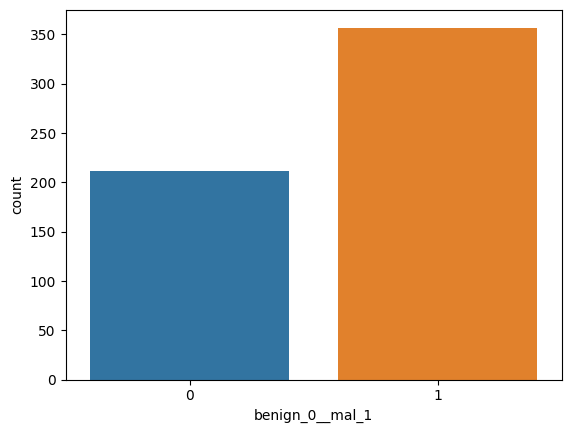

In [7]:
sns.countplot(x = 'benign_0__mal_1',data = df)

We are trying to predict benign_0__mal_1

In [8]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [10]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

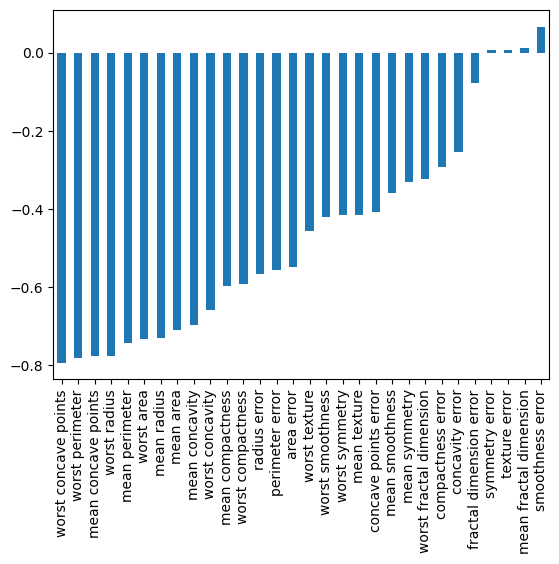

In [12]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

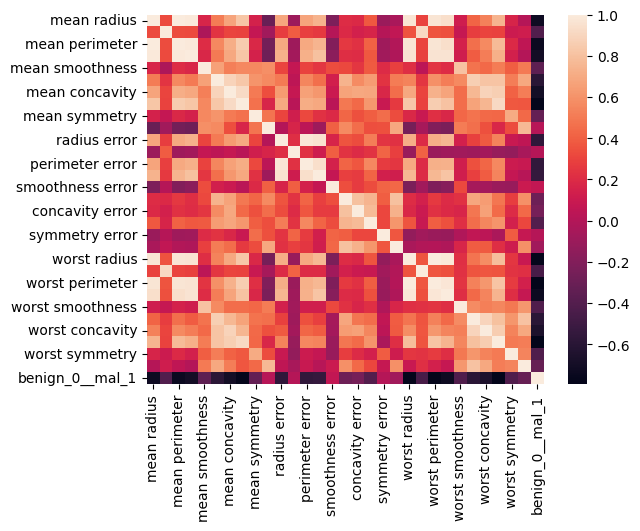

In [13]:
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc = MinMaxScaler()

In [20]:
X_train = sc.fit_transform(X_train)

In [21]:
X_test = sc.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

Since a binary classification, we need last neuron to have sigmoid activn function

In [26]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 18ms/step - loss: 0.6883 - val_loss: 0.6682
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6497 - val_loss: 0.6334
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6084 - val_loss: 0.5894
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5612 - val_loss: 0.5385
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5069 - val_loss: 0.4815
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4523 - val_loss: 0.4272
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4018 - val_loss: 0.3753
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3557 - val_loss: 0.3349
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3190 - val_loss: 0.2999
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2885 - val_loss: 0.2734
Epoch 11

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses

,loss,val_loss
0,0.688338,0.668245
1,0.649655,0.633360
2,0.608362,0.589369
3,0.561227,0.538500
4,0.506888,0.481519
...,...,...
595,0.009349,0.258907
596,0.010563,0.239323
597,0.010209,0.291113
598,0.010791,0.235967


<Axes: >

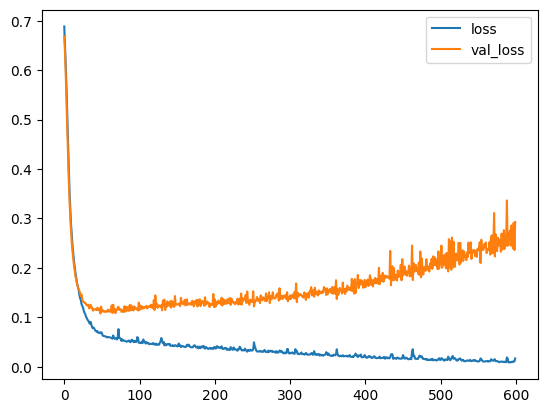

In [30]:
losses.plot()

Validation loss increases, training loss decreases

Overfitting

In [31]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

Waiting 25 epochs even after detecting stopping point because of noise

Maximize accuracy, minimize loss

In [34]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [es])

Epoch 1/600
14/14 [==============================] - 3s 21ms/step - loss: 0.6801 - val_loss: 0.6637
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6530 - val_loss: 0.6387
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6258 - val_loss: 0.6093
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5929 - val_loss: 0.5710
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5460 - val_loss: 0.5253
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5010 - val_loss: 0.4773
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4494 - val_loss: 0.4208
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3996 - val_loss: 0.3734
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3586 - val_loss: 0.3329
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3242 - val_loss: 0.2990
Epoch 11

In [35]:
ls = pd.DataFrame(model.history.history)

<Axes: >

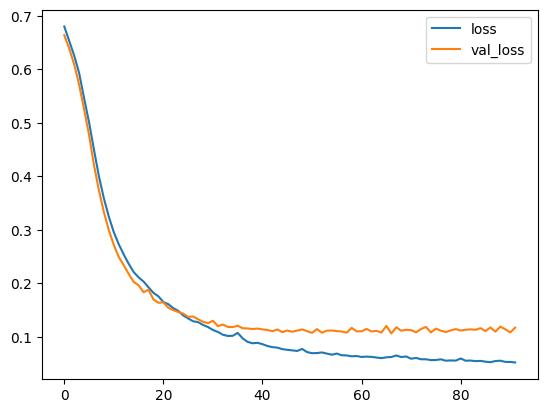

In [36]:
ls.plot()

Dropout layers to turn off a percentage of neurons

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
# 0.2 to 0.5
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [39]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [es])

Epoch 1/600
14/14 [==============================] - 2s 30ms/step - loss: 0.6926 - val_loss: 0.6728
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6764 - val_loss: 0.6605
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6601 - val_loss: 0.6482
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6440 - val_loss: 0.6287
Epoch 5/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6383 - val_loss: 0.6112
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6231 - val_loss: 0.5937
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6000 - val_loss: 0.5739
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6003 - val_loss: 0.5502
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5801 - val_loss: 0.5257
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5692 - val_loss: 0.4984
Epoch 

<Axes: >

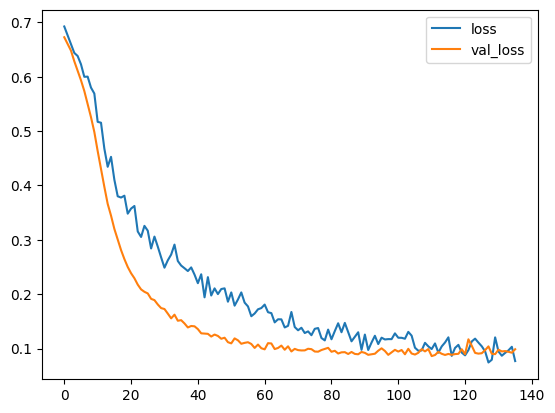

In [41]:
pd.DataFrame(model.history.history).plot()

In [47]:
model_loss = pd.DataFrame(model.history.history)

In [50]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [51]:
y_predict = np.where(y_pred > 0.5, 1,0)

In [52]:
y_predict

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [55]:
print(confusion_matrix(y_test, y_predict))

[[54  1]
 [ 2 86]]
